In [12]:
from os import listdir
from os.path import isfile, join
# from Utils import Load, Write
import pandas as pd
import numpy as np
from scipy import stats
# import math
import re
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
# from matplotlib import cm
# import plotly.plotly as py
from myplots import roundup, rounddown, find_decimal_fold, percentile_cut_off, rarefaction_calc, rarefaction_plot
from matplotlib.ticker import FormatStrFormatter
import cPickle as pickle
from Bio.SeqUtils import GC
from collections import Counter
import myplots
from myplots import calc_sig_corr
import os
from queue.qp import qp,fakeqp
from addloglevels import sethandlers
import logging 
from Utils import cacheOnDisk


### load dfs with sharing information, generate one big df and groupby samples

In [9]:
with open("/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/Pickles/sample_df_prod_wityPublic_HIP00110") as f:
    sample_df_prod_wityPublic_HIP00110=pickle.load(f)
f.close()



#Z:\Lab\Personal\ShaniBAF\TCR_demo_data\Pickles
#sample_df_prod_wityPublic_grouped_HIP08596

In [10]:
sample_df_prod_wityPublic_HIP00110

,nucleotide,aminoAcid,count (reads),frequencyCount (%),cdr3Length,vMaxResolved,vFamilyName,vGeneName,vGeneAllele,vFamilyTies,...,vOrphon,dOrphon,jOrphon,vFunction,dFunction,jFunction,fractionNucleated,n_samples,_merge,shareStatus
1,GCTACCAGCTCCCAGACATCTGTGTACTTCTGTGCCACCACGGGTA...,CATTGTSGGPSQSTQYF,44434,1.094612,51,TCRBV10-03*01,TCRBV10,TCRBV10-03,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.399490e-03,1,both,0
5999,GCTGCTCCCTCCCAGACATCTGTGTACTTCTGTGCCACCACGGGTA...,CATTGTSGGPSQSTQYF,84,0.002069,51,TCRBV06,TCRBV06,unresolved,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.320000e-06,1,both,0
84037,GCTACCCGCTCCCAGACATCTGTGTATTTCTGTGCCACCACGGGTA...,CATTGTSGGPSQSTQYF,10,0.000246,51,TCRBV10-02*01,TCRBV10,TCRBV10-02,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,9.900000e-07,1,both,0
95479,CCTACCAGCTCCCAGACATCTGTGTACTTCTGTGCCACTACGGGTA...,CATTGTSGGPSQSTQYF,7,0.000172,51,TCRBV10-03*01,TCRBV10,TCRBV10-03,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.900000e-07,1,both,0
96918,GCTGTACCCTCTCAGACATCTGTGTACTTCTGTGCCACCACGGGTA...,CATTGTSGGPSQSTQYF,7,0.000172,51,TCRBV06-04,TCRBV06,TCRBV06-04,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.900000e-07,1,both,0
98510,CCTTCCAGCTCCCAGACATCTGTGTACTTCTGTGCCACCACGGGTA...,CATTGTSGGPSQSTQYF,6,0.000148,51,TCRBV10-03*01,TCRBV10,TCRBV10-03,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.900000e-07,1,both,0
98641,CGCTACAGCTCCCAGACATCTGTGTACTTCTGTGCCACCACGGGTA...,CATTGTSGGPSQSTQYF,6,0.000148,51,TCRBV10-03*01,TCRBV10,TCRBV10-03,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.900000e-07,1,both,0
99981,GCTGCCTCCTCCCAGACATCTGTGTACTTCTGTGCCACCACGGGTA...,CATTGTSGGPSQSTQYF,6,0.000148,51,TCRBV06,TCRBV06,unresolved,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.900000e-07,1,both,0
100531,TCAGAACCCAGGGACTCAGCTGTGTACTTCTGTGCCACCACGGGTA...,CATTGTSGGPSQSTQYF,6,0.000148,51,TCRBV12,TCRBV12,unresolved,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.900000e-07,1,both,0
102036,ACTACCAGCTCCCAGACATCTGTGTACTTCTGTGCCACGACGGGTA...,CATTGTSGGPSQSTQYF,6,0.000148,51,TCRBV10-03*01,TCRBV10,TCRBV10-03,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.900000e-07,1,both,0


In [11]:
sample_df_prod_wityPublic_HIP00110.groupby('shareStatus').mean()

,count (reads),frequencyCount (%),cdr3Length,vGeneAllele,dGeneAllele,jGeneAllele,jFamilyTies,jGeneAlleleTies,vDeletion,n1Insertion,...,jIndex,estimatedNumberGenomes,vOrphon,dOrphon,jOrphon,vFunction,dFunction,jFunction,fractionNucleated,n_samples
shareStatus,,,,,,,,,,,,,,,,,,,,,
0,27.895819,0.000687,45.965059,1.034341,1.114515,1.0,NaN,NaN,3.947310,5.676430,...,64.854947,1.620935,NaN,NaN,NaN,NaN,NaN,NaN,0.000003,1.000000
1,33.296510,0.000820,41.565657,1.039137,1.111977,1.0,NaN,NaN,3.530571,2.854875,...,63.826996,1.749463,NaN,NaN,NaN,NaN,NaN,NaN,0.000003,63.547168


In [12]:
sample_df_prod_wityPublic_HIP00110.columns.values

array(['nucleotide', 'aminoAcid', 'count (reads)', 'frequencyCount (%)',
       'cdr3Length', 'vMaxResolved', 'vFamilyName', 'vGeneName',
       'vGeneAllele', 'vFamilyTies', 'vGeneNameTies', 'vGeneAlleleTies',
       'dMaxResolved', 'dFamilyName', 'dGeneName', 'dGeneAllele',
       'dFamilyTies', 'dGeneNameTies', 'dGeneAlleleTies', 'jMaxResolved',
       'jFamilyName', 'jGeneName', 'jGeneAllele', 'jFamilyTies',
       'jGeneNameTies', 'jGeneAlleleTies', 'vDeletion', 'n1Insertion',
       'd5Deletion', 'd3Deletion', 'n2Insertion', 'jDeletion', 'vIndex',
       'n1Index', 'dIndex', 'n2Index', 'jIndex', 'estimatedNumberGenomes',
       'sequenceStatus', 'cloneResolved', 'vOrphon', 'dOrphon', 'jOrphon',
       'vFunction', 'dFunction', 'jFunction', 'fractionNucleated',
       'n_samples', '_merge', 'shareStatus'], dtype=object)

In [13]:
columns_to_keep=['nucleotide', 'aminoAcid', 'count (reads)', 'frequencyCount (%)',
       'cdr3Length', 'vFamilyName', 'vGeneName',
       'dFamilyName', 'jFamilyName', 'jGeneName', 'vDeletion', 'n1Insertion',
       'd5Deletion', 'd3Deletion', 'n2Insertion', 'jDeletion', 'vIndex',
       'n1Index', 'dIndex', 'n2Index', 'jIndex', 'n_samples', 'shareStatus']

In [14]:
sample_df_prod_wityPublic_HIP00110=sample_df_prod_wityPublic_HIP00110[columns_to_keep]

In [15]:
sample_df_prod_wityPublic_HIP00110.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104850 entries, 1 to 130938
Data columns (total 50 columns):
nucleotide                104850 non-null object
aminoAcid                 104850 non-null object
count (reads)             104850 non-null int64
frequencyCount (%)        104850 non-null float64
cdr3Length                104850 non-null int64
vMaxResolved              104850 non-null object
vFamilyName               104724 non-null object
vGeneName                 104850 non-null object
vGeneAllele               63532 non-null float64
vFamilyTies               126 non-null object
vGeneNameTies             21084 non-null object
vGeneAlleleTies           20234 non-null object
dMaxResolved              104850 non-null object
dFamilyName               81496 non-null object
dGeneName                 104850 non-null object
dGeneAllele               69042 non-null float64
dFamilyTies               22701 non-null object
dGeneNameTies             22701 non-null object
dGeneAlleleTies 

In [16]:
sample_df_prod_wityPublic_HIP00110_small.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104850 entries, 1 to 130938
Data columns (total 23 columns):
nucleotide            104850 non-null object
aminoAcid             104850 non-null object
count (reads)         104850 non-null int64
frequencyCount (%)    104850 non-null float64
cdr3Length            104850 non-null int64
vFamilyName           104724 non-null object
vGeneName             104850 non-null object
dFamilyName           81496 non-null object
jFamilyName           104850 non-null object
jGeneName             104850 non-null object
vDeletion             104850 non-null int64
n1Insertion           104850 non-null int64
d5Deletion            104850 non-null int64
d3Deletion            104850 non-null int64
n2Insertion           104850 non-null int64
jDeletion             104850 non-null int64
vIndex                104850 non-null int64
n1Index               104850 non-null int64
dIndex                104850 non-null int64
n2Index               104850 non-null int64
j

In [15]:
def get_sampleWithSharingInfoNonProd_list():
    sample_list=[f for f in listdir("/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/Pickles") if isfile(join("/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/Pickles", f))]
    sample_list = [sample for sample in sample_list if sample.startswith ('sample_df_non_prod_wityPublic_HIP')]
    sample_list=[s.replace(".tsv", "") for s in sample_list]
    
    return sample_list


#sample_df_prod_wityPublic_HIP00110

In [6]:
def get_sampleWithSharingInfoProd_list():
    sample_list=[f for f in listdir("/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/Pickles") if isfile(join("/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/Pickles", f))]
    sample_list = [sample for sample in sample_list if sample.startswith ('sample_df_prod_wityPublic_HIP')]
    sample_list=[s.replace(".tsv", "") for s in sample_list]
    
    return sample_list


#sample_df_prod_wityPublic_HIP00110

In [16]:
sampleWithSharingInfoNonProd_list=get_sampleWithSharingInfoNonProd_list()

In [7]:
sampleWithSharingInfoProd_list=get_sampleWithSharingInfoProd_list()

In [17]:
print len (sampleWithSharingInfoNonProd_list)

573


In [9]:
print len (sampleWithSharingInfoProd_list)

573


In [20]:
sampleWithSharingInfoNonProd_list[:10]

['sample_df_non_prod_wityPublic_HIP02875',
 'sample_df_non_prod_wityPublic_HIP03677',
 'sample_df_non_prod_wityPublic_HIP13265',
 'sample_df_non_prod_wityPublic_HIP02112',
 'sample_df_non_prod_wityPublic_HIP14071',
 'sample_df_non_prod_wityPublic_HIP14192',
 'sample_df_non_prod_wityPublic_HIP03693',
 'sample_df_non_prod_wityPublic_HIP14095',
 'sample_df_non_prod_wityPublic_HIP14176',
 'sample_df_non_prod_wityPublic_HIP16738']

In [19]:
columns_to_keep=['nucleotide', 'aminoAcid', 'count (reads)', 'frequencyCount (%)',
       'cdr3Length', 'vFamilyName', 'vGeneName',
       'dFamilyName', 'jFamilyName', 'jGeneName', 'vDeletion', 'n1Insertion',
       'd5Deletion', 'd3Deletion', 'n2Insertion', 'jDeletion', 'vIndex',
       'n1Index', 'dIndex', 'n2Index', 'jIndex', 'n_samples', 'shareStatus']
nonProdSharingInfoDF=pd.DataFrame()
for n,df in enumerate(sampleWithSharingInfoNonProd_list):
    print n
    with open("/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/Pickles/%s" %df) as f:
        sharingInfoDF=pickle.load(f)
    f.close()
    sharingInfoDF=sharingInfoDF[columns_to_keep]
    sharingInfoDF.set_index('nucleotide',inplace=1)
    nonProdSharingInfoDF=pd.concat([nonProdSharingInfoDF,sharingInfoDF])

 
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [10]:
basePath='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/public_analysis/Public sequence analysis'

In [ ]:
@cacheOnDisk(basePath=basePath, filename='get_ProdSharingInfoDF_%(min_sample)s_%(max_sample)s', force=True)
def get_ProdSharingInfoDF(min_sample,max_sample)
    if max_sample>573:
        max_sample=573
    ProdSharingInfoDF=pd.DataFrame()
    for n,df in enumerate(sampleWithSharingInfoProd_list[min_sample:max_sample]):
        print n
        with open("/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/Pickles/%s" %df) as f:
            sharingInfoDF=pickle.load(f)
        f.close()
        sharingInfoDF=sharingInfoDF[columns_to_keep]
        sharingInfoDF.set_index('nucleotide',inplace=1)
        ProdSharingInfoDF=pd.concat([ProdSharingInfoDF,sharingInfoDF])
return ProdSharingInfoDF
 
    

In [ ]:
sethandlers()
os.chdir(basePath)
## the inputs for qp are: jobname, q=machine list, *** add max_r to prevent exploding the cluster!!***
with qp('get_ProdSharingInfoDF_job',  q = ['himem7.q','16g.q'], mem_def="10G", trds_def=2, deleteCSHwithnoerr = True, tryrerun = False, max_u=120) as q:
    q.startpermanentrun()
    wait_on =[]
    
##now define a loop that divide the job and send each part seperately:

    min_sample=0
    max_sample=20 
    while  min_sample<573:                                     
        print min_sample
        wait_on.append(q.method(get_ProdSharingInfoDF,kwargs={'min_sample':min_sample,'max_sample':max_sample}))
            ##q.method takes the desired function with its arguments and send it to the queue.
        min_sample=min_sample+20
        max_sample=max_sample+20
    q.wait(wait_on)


In [20]:
print len(columns_to_keep)
print len(nonProdSharingInfoDF.columns.values)
print len(nonProdSharingInfoDF)

23
22
2215236


In [21]:
nonProdSharingInfoDF.head()

,aminoAcid,count (reads),frequencyCount (%),cdr3Length,vFamilyName,vGeneName,dFamilyName,jFamilyName,jGeneName,vDeletion,...,d3Deletion,n2Insertion,jDeletion,vIndex,n1Index,dIndex,n2Index,jIndex,n_samples,shareStatus
nucleotide,,,,,,,,,,,,,,,,,,,,,
GAACCCAGGGACTCAGCTGTGTACTTCTGTGCCAGCAGTTAAACCGGGACAGGGGGCGAAGATGTCATTGGCTACACCTTCGGTTCG,CASS*TGTGGEDVIGYTF,1792,0.045689,54,TCRBV12,unresolved,TCRBD01,TCRBJ01,TCRBJ01-02,4,...,0,11,7,27,40,45,57,68,1,0
GCTCCCTCCCAAACATCTGTGTACTTCTGTGCCAGCAGTTAAACCGGGACAGGGGGCGAAGATGTCATTGGCTACACCTTCGGTTCG,CASS*TGTGGEDVIGYTF,4,0.000102,54,TCRBV06,unresolved,TCRBD01,TCRBJ01,TCRBJ01-02,3,...,0,11,7,27,41,45,57,68,1,0
GCTCCCTCCCAGACATCTGTGTACTTCTGTGCCAGCAGTTAAACCGGGACAGGGGGCGAAGATGTCATTGGCTACACCTTCGGTTCG,CASS*TGTGGEDVIGYTF,2,0.000051,54,TCRBV06,unresolved,TCRBD01,TCRBJ01,TCRBJ01-02,3,...,0,11,7,27,41,45,57,68,1,0
TCCACGGAGTCAGGGGACACAGCACTGTATTTCTGTGCCAGCAGCAAAAACTAGCGGGGGGGCACAGATACGCAGTATTTTGGCCCA,CASSKN*RGGTDTQYF,722,0.018408,48,TCRBV21,TCRBV21-01,TCRBD02,TCRBJ02,TCRBJ02-03,2,...,1,0,1,33,48,49,-1,61,3,1
GAGTCAGCTGCTCCCTCCCAGACATCTGTATACTTCTGTGCCAGCAGTTACTGACAGGGCCTTACCTACGAGCAGTACTTCGGGCCG,CASSY*QGLTYEQYF,690,0.017592,45,TCRBV06,TCRBV06-09,TCRBD01,TCRBJ02,TCRBJ02-07,3,...,3,5,2,36,50,52,59,64,2,1


In [22]:
nonProdSharingInfoDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2215236 entries, GAACCCAGGGACTCAGCTGTGTACTTCTGTGCCAGCAGTTAAACCGGGACAGGGGGCGAAGATGTCATTGGCTACACCTTCGGTTCG to TTTGCTGCCTCCTCCCAGACATCTGTATATTTCTGCGCCAGCAGTGAGGGGTCAGTTTGAATGAACACTGAAGCTTTCTTTGGACAA
Data columns (total 22 columns):
aminoAcid             object
count (reads)         int64
frequencyCount (%)    float64
cdr3Length            int64
vFamilyName           object
vGeneName             object
dFamilyName           object
jFamilyName           object
jGeneName             object
vDeletion             int64
n1Insertion           int64
d5Deletion            int64
d3Deletion            int64
n2Insertion           int64
jDeletion             int64
vIndex                int64
n1Index               int64
dIndex                int64
n2Index               int64
jIndex                int64
n_samples             int64
shareStatus           int64
dtypes: float64(1), int64(15), object(6)
memory usage: 388.7+ MB


In [23]:
f='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/public_analysis/public sequence analysis/nonProd573SharingInfoDF.h5'
nonProdSharingInfoDF.to_hdf(f,'df',mode='w',format='table',complib='blosc',complevel=9)

In [24]:
nonProd573SharingInfoDF=pd.read_hdf('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/public_analysis/public sequence analysis/nonProd573SharingInfoDF.h5','df')

In [25]:
nonProd573SharingInfoDF.head()

,aminoAcid,count (reads),frequencyCount (%),cdr3Length,vFamilyName,vGeneName,dFamilyName,jFamilyName,jGeneName,vDeletion,...,d3Deletion,n2Insertion,jDeletion,vIndex,n1Index,dIndex,n2Index,jIndex,n_samples,shareStatus
nucleotide,,,,,,,,,,,,,,,,,,,,,
GAACCCAGGGACTCAGCTGTGTACTTCTGTGCCAGCAGTTAAACCGGGACAGGGGGCGAAGATGTCATTGGCTACACCTTCGGTTCG,CASS*TGTGGEDVIGYTF,1792,0.045689,54,TCRBV12,unresolved,TCRBD01,TCRBJ01,TCRBJ01-02,4,...,0,11,7,27,40,45,57,68,1,0
GCTCCCTCCCAAACATCTGTGTACTTCTGTGCCAGCAGTTAAACCGGGACAGGGGGCGAAGATGTCATTGGCTACACCTTCGGTTCG,CASS*TGTGGEDVIGYTF,4,0.000102,54,TCRBV06,unresolved,TCRBD01,TCRBJ01,TCRBJ01-02,3,...,0,11,7,27,41,45,57,68,1,0
GCTCCCTCCCAGACATCTGTGTACTTCTGTGCCAGCAGTTAAACCGGGACAGGGGGCGAAGATGTCATTGGCTACACCTTCGGTTCG,CASS*TGTGGEDVIGYTF,2,0.000051,54,TCRBV06,unresolved,TCRBD01,TCRBJ01,TCRBJ01-02,3,...,0,11,7,27,41,45,57,68,1,0
TCCACGGAGTCAGGGGACACAGCACTGTATTTCTGTGCCAGCAGCAAAAACTAGCGGGGGGGCACAGATACGCAGTATTTTGGCCCA,CASSKN*RGGTDTQYF,722,0.018408,48,TCRBV21,TCRBV21-01,TCRBD02,TCRBJ02,TCRBJ02-03,2,...,1,0,1,33,48,49,-1,61,3,1
GAGTCAGCTGCTCCCTCCCAGACATCTGTATACTTCTGTGCCAGCAGTTACTGACAGGGCCTTACCTACGAGCAGTACTTCGGGCCG,CASSY*QGLTYEQYF,690,0.017592,45,TCRBV06,TCRBV06-09,TCRBD01,TCRBJ02,TCRBJ02-07,3,...,3,5,2,36,50,52,59,64,2,1


In [32]:
nonProd573SharingInfoDF.groupby('cdr3Length').count()

,aminoAcid,count (reads),frequencyCount (%),vFamilyName,vGeneName,dFamilyName,jFamilyName,jGeneName,vDeletion,n1Insertion,...,d3Deletion,n2Insertion,jDeletion,vIndex,n1Index,dIndex,n2Index,jIndex,n_samples,shareStatus
cdr3Length,,,,,,,,,,,,,,,,,,,,,
3,11,11,11,11,11,3,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
6,26,26,26,26,26,6,26,26,26,26,...,26,26,26,26,26,26,26,26,26,26
9,61,61,61,61,61,21,61,61,61,61,...,61,61,61,61,61,61,61,61,61,61
12,115,115,115,115,115,33,115,115,115,115,...,115,115,115,115,115,115,115,115,115,115
15,290,290,290,290,290,142,290,290,290,290,...,290,290,290,290,290,290,290,290,290,290
18,802,802,802,802,802,359,802,802,802,802,...,802,802,802,802,802,802,802,802,802,802
21,1567,1567,1567,1566,1567,786,1567,1567,1567,1567,...,1567,1567,1567,1567,1567,1567,1567,1567,1567,1567
24,3456,3456,3456,3456,3456,2049,3456,3456,3456,3456,...,3456,3456,3456,3456,3456,3456,3456,3456,3456,3456
27,7531,7531,7531,7531,7531,4571,7531,7531,7531,7531,...,7531,7531,7531,7531,7531,7531,7531,7531,7531,7531


In [35]:
print len(nonProd573SharingInfoDF)
print len(nonProd573SharingInfoDF.index.unique())
print len(nonProd573SharingInfoDF['aminoAcid'].unique())
print float(len(nonProd573SharingInfoDF.index.unique()))/len(nonProd573SharingInfoDF['aminoAcid'].unique())


2215236
2211307
2034983
1.08664642407


In [51]:
nonProd573SharingInfoDF_noDupAA=nonProd573SharingInfoDF.groupby('aminoAcid').mean()

In [52]:
print len(nonProd573SharingInfoDF_noDupAA)

2034983


In [53]:
nonProd573SharingInfoDF_noDupAA.head()

,count (reads),frequencyCount (%),cdr3Length,vDeletion,n1Insertion,d5Deletion,d3Deletion,n2Insertion,jDeletion,vIndex,n1Index,dIndex,n2Index,jIndex,n_samples,shareStatus
aminoAcid,,,,,,,,,,,,,,,,
*,15.454545,0.000414,3.0,26.909091,5.181818,4.272727,4.090909,5.545455,20.818182,78.0,16.636364,58.181818,23.272727,81.0,9.0,1.0
***ATNEKLFF,11.000000,0.000786,33.0,16.000000,2.000000,5.000000,8.000000,4.000000,0.000000,48.0,49.000000,51.000000,54.000000,58.0,1.0,0.0
***GGRSQPQHF,16.000000,0.000262,36.0,15.000000,6.000000,5.000000,1.000000,6.000000,6.000000,45.0,47.000000,53.000000,59.000000,65.0,1.0,0.0
***GQGLYEQYF,3.000000,0.000083,36.0,15.000000,6.000000,0.000000,2.000000,2.000000,3.000000,45.0,47.000000,53.000000,63.000000,65.0,1.0,0.0
***P*RGFGTQYF,11.000000,0.000180,39.0,14.000000,9.000000,4.000000,2.000000,5.000000,8.000000,42.0,44.000000,53.000000,63.000000,68.0,1.0,0.0


In [68]:

nonProd573SharingInfoDF_noDupAA["permutate shareStatus"]=nonProd573SharingInfoDF_noDupAA.apply(np.random.permutation)["shareStatus"]

In [54]:
f='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/public_analysis/public sequence analysis/nonProd573SharingInfoDF_noDupAA.h5'
nonProd573SharingInfoDF_noDupAA.to_hdf(f,'df',mode='w',format='table',complib='blosc',complevel=9)

In [78]:
print len(nonProd573SharingInfoDF_noDupAA)

2034983


In [58]:
nonProd573comparePriToPub=nonProd573SharingInfoDF_noDupAA.groupby('shareStatus').agg([np.mean,np.std])

In [69]:
nonProd573comparePriToPub_permut=nonProd573SharingInfoDF_noDupAA.groupby("permutate shareStatus").agg([np.mean,np.std])

In [59]:
nonProd573comparePriToPub

count (reads)             frequencyCount (%)           cdr3Length  \
                     mean         std               mean       std       mean   
shareStatus                                                                     
0.0             17.199621   71.669947           0.000327  0.001511  48.797096   
1.0             22.646156  134.578455           0.000436  0.002784  42.109149   

                      vDeletion           n1Insertion              ...     \
                  std      mean       std        mean       std    ...      
shareStatus                                                        ...      
0.0          7.532221  4.096943  3.120298    6.369068  4.671002    ...      
1.0          5.497131  3.862091  2.375014    2.606580  1.867645    ...      

               n1Index                dIndex              n2Index             \
                  mean        std       mean       std       mean        std   
shareStatus                                                                    
0.0          41.834851  12.558200  51.079902  6.248852  53.142678  16.844840   
1.0          41.516615  15.999049  53.920640  5.576048  45.341902  22.290199   

                jIndex           n_samples            
                  mean       std      mean       std  
shareStatus                                           
0.0          64.648530  3.970960  1.000000  0.000000  
1.0          63.873066  3.025587  2.819386  2.531793  

[2 rows x 30 columns]

In [70]:
nonProd573comparePriToPub_permut

count (reads)            frequencyCount (%)            \
                               mean        std               mean       std   
permutate shareStatus                                                         
0.0                       17.340911  74.477675           0.000330  0.001569   
1.0                       17.120619  45.742568           0.000326  0.000925   

                      cdr3Length           vDeletion           n1Insertion  \
                            mean       std      mean       std        mean   
permutate shareStatus                                                        
0.0                    48.630341  7.560202  4.090651  3.103406    6.275205   
1.0                    48.630533  7.570791  4.108158  3.131419    6.277373   

                                   ...        dIndex              n2Index  \
                            std    ...          mean       std       mean   
permutate shareStatus              ...                                      
0.0                    4.659246    ...     51.151060  6.249332  52.950808   
1.0                    4.645555    ...     51.137839  6.223045  52.845488   

                                     jIndex           n_samples            \
                             std       mean       std      mean       std   
permutate shareStatus                                                       
0.0                    17.042150  64.629846  3.953015  1.045400  0.492191   
1.0                    17.166518  64.603785  3.911648  1.043912  0.404465   

                      shareStatus            
                             mean       std  
permutate shareStatus                        
0.0                      0.024942  0.155948  
1.0                      0.024577  0.154834  

[2 rows x 32 columns]

In [61]:
private=nonProd573SharingInfoDF_noDupAA[nonProd573SharingInfoDF_noDupAA["shareStatus"]==0]
public=nonProd573SharingInfoDF_noDupAA[nonProd573SharingInfoDF_noDupAA["shareStatus"]==1]
pub95=nonProd573SharingInfoDF_noDupAA[nonProd573SharingInfoDF_noDupAA['n_samples']>544]

    
    
    

In [71]:
private_permut=nonProd573SharingInfoDF_noDupAA[nonProd573SharingInfoDF_noDupAA["permutate shareStatus"]==0]
public_permut=nonProd573SharingInfoDF_noDupAA[nonProd573SharingInfoDF_noDupAA["permutate shareStatus"]==1]
pub95_permut=nonProd573SharingInfoDF_noDupAA[nonProd573SharingInfoDF_noDupAA['n_samples']>544]

    
    
    

In [66]:
ks_p_list=[]
t_p_list=[]
grouping_stat_list=[]
for column in nonProd573SharingInfoDF_noDupAA.columns.values:
    ks_s,ks_p=stats.ks_2samp(private[column],public[column])
    t_s,t_p=stats.ttest_ind(private[column],public[column])
    #ks_p_list.append(ks_p)
    #t_p_list.append(t_p)
    grouping_stat_list.append({'column': column,'p value KS test': round(ks_p,6), 'p value ttest': round(t_p,6)})

grouping_stat_df=pd.DataFrame(grouping_stat_list)
    
    

In [76]:
ks_p_list_permut=[]
t_p_list_permut=[]
grouping_stat_list_permut=[]
for column in nonProd573SharingInfoDF_noDupAA.columns.values:
    ks_s,ks_p=stats.ks_2samp(private_permut[column],public_permut[column])
    t_s,t_p=stats.ttest_ind(private_permut[column],public_permut[column])
    #ks_p_list.append(ks_p)
    #t_p_list.append(t_p)
    grouping_stat_list_permut.append({'column': column,'p value KS test': round(ks_p,6), 'p value ttest': round(t_p,6)})

grouping_stat_df_permut=pd.DataFrame(grouping_stat_list_permut)
    
    

In [67]:
grouping_stat_df

,column,p value KS test,p value ttest
0,count (reads),0.0,0.000000
1,frequencyCount (%),0.0,0.000000
2,cdr3Length,0.0,0.000000
3,vDeletion,0.0,0.000000
4,n1Insertion,0.0,0.000000
5,d5Deletion,0.0,0.876069
6,d3Deletion,0.0,0.000000
7,n2Insertion,0.0,0.000000
8,jDeletion,0.0,0.000000
9,vIndex,0.0,0.000000


In [77]:
grouping_stat_df_permut

,column,p value KS test,p value ttest
0,count (reads),0.896376,0.507290
1,frequencyCount (%),0.381187,0.542397
2,cdr3Length,0.985158,0.995486
3,vDeletion,0.742676,0.209681
4,n1Insertion,0.999999,0.917563
5,d5Deletion,0.908434,0.707237
6,d3Deletion,0.405485,0.383573
7,n2Insertion,0.935882,0.379679
8,jDeletion,0.452405,0.082225
9,vIndex,0.985158,0.995486


In [ ]:
private=nonProd573SharingInfoDF_noDupAA[nonProd573SharingInfoDF_noDupAA["shareStatus"]==0]
public=nonProd573SharingInfoDF_noDupAA[nonProd573SharingInfoDF_noDupAA["shareStatus"]==1]
pub95=nonProd573SharingInfoDF_noDupAA[nonProd573SharingInfoDF_noDupAA['n_samples']>544]

    
    
    

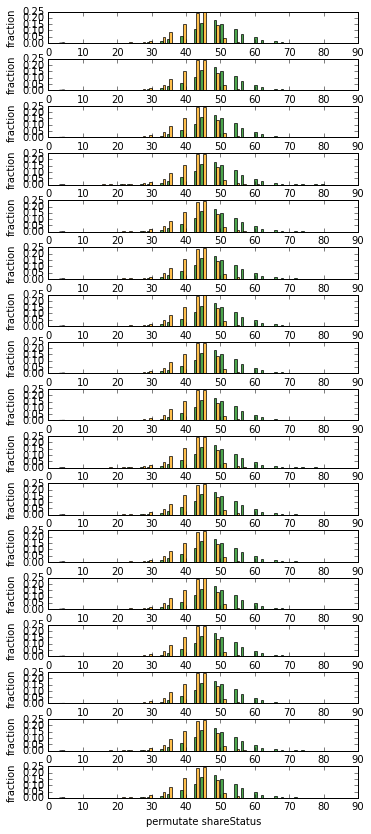

In [90]:
fig=plt.figure(figsize=(5,14))
#plt.suptitle('%s population features' %title, fontsize=16)
n_plots=len(nonProd573SharingInfoDF_noDupAA.columns.values)



for n,column in enumerate(nonProd573SharingInfoDF_noDupAA.columns.values):
    #ks_s,ks_p=stats.ks_2samp(private[column],public[column])
    #t_s,t_p=stats.ttest_ind(private[column],public[column])
    private_nonProd=list(nonProd573SharingInfoDF_noDupAA[nonProd573SharingInfoDF_noDupAA["shareStatus"]==0][column])
    public_nonProd=list(nonProd573SharingInfoDF_noDupAA[nonProd573SharingInfoDF_noDupAA["shareStatus"]==1][column])
    weights_private=(np.ones_like(private_nonProd_CDR3, dtype=np.float))/len(private_nonProd_CDR3)
    weights_public=(np.ones_like(public_nonProd_CDR3, dtype=np.float))/len(public_nonProd_CDR3)

    ax= plt.subplot2grid((n_plots,1), (n,0)) 
    plot=ax.hist((private_nonProd_CDR3,public_nonProd_CDR3), bins=40, weights=[weights_private,weights_public], color=('green', 'orange'), label=('Private','Public'), alpha=0.7)
    ax.set_xlabel(column)
    ax.set_ylabel('fraction')

plt.subplots_adjust(left=0.09,bottom=0.11, right=0.95, top=0.89, wspace=0.24,hspace=0.50)      
plt.show()
                         #ks_p, t_p=stat_tests(prod_l,non_prod_l)
#ax.annotate('KS_p_value=%s\nt-test_p_value=%s' %(ks_p, t_p), xy=(0.95, 0.95), xycoords='axes fraction', fontsize=8,
#horizontalalignment='right', verticalalignment='top', fontweight='bold')

In [60]:
573*0.95

544.35

1. save df
2. repeat for prod
3. remove duplicate sequences
4. disqualify sequences (short, non canonical)
4. group by shareStatus
5. plot distributions
6. calculate t-test, KS with correction for multiple testing